# Introduction

Reva Fahrian Natamenggala / PYTN-KS20-017

Dataset yang digunakan terkait dengan kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, diperlukan lebih dari satu kontak ke klien yang sama, untuk mengakses apakah produk (deposito berjangka bank) akan berlangganan ('yes') atau tidak ('no').

Tujuannya adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel 'yes').

# Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_confusion_matrix

# Data Loading

In [2]:
df = pd.read_csv('bank-full.csv')
print('data read into a pandas dataframe')

data read into a pandas dataframe


In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Visualize

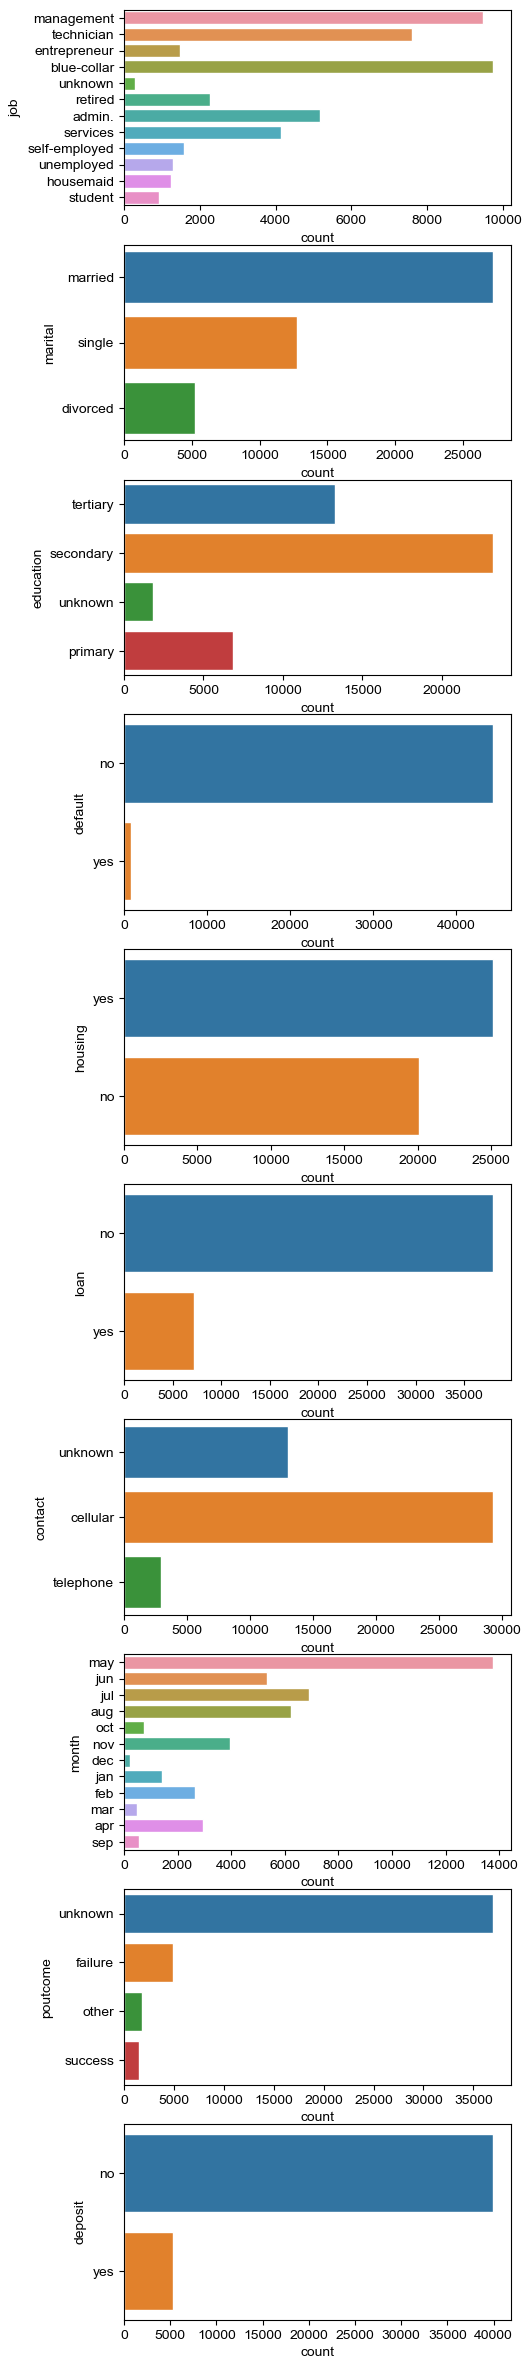

In [4]:
cat = ["job", "marital", "education", "default", "housing", 
       "loan", "contact", "month", "poutcome", "deposit" ]

fig, ax = plt.subplots(len(cat), 1, figsize=(5, 30))
for variable, subplot in zip(cat, ax.flatten()):
    sns.set_style("ticks")
    sns.countplot(y = df[variable], ax=subplot, label = 'medium')
    for label in subplot.get_xticklabels():
        label.set_rotation(0)
        plt.rcParams["font.family"] = "arial"

In [5]:
df["pdays"].value_counts()

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


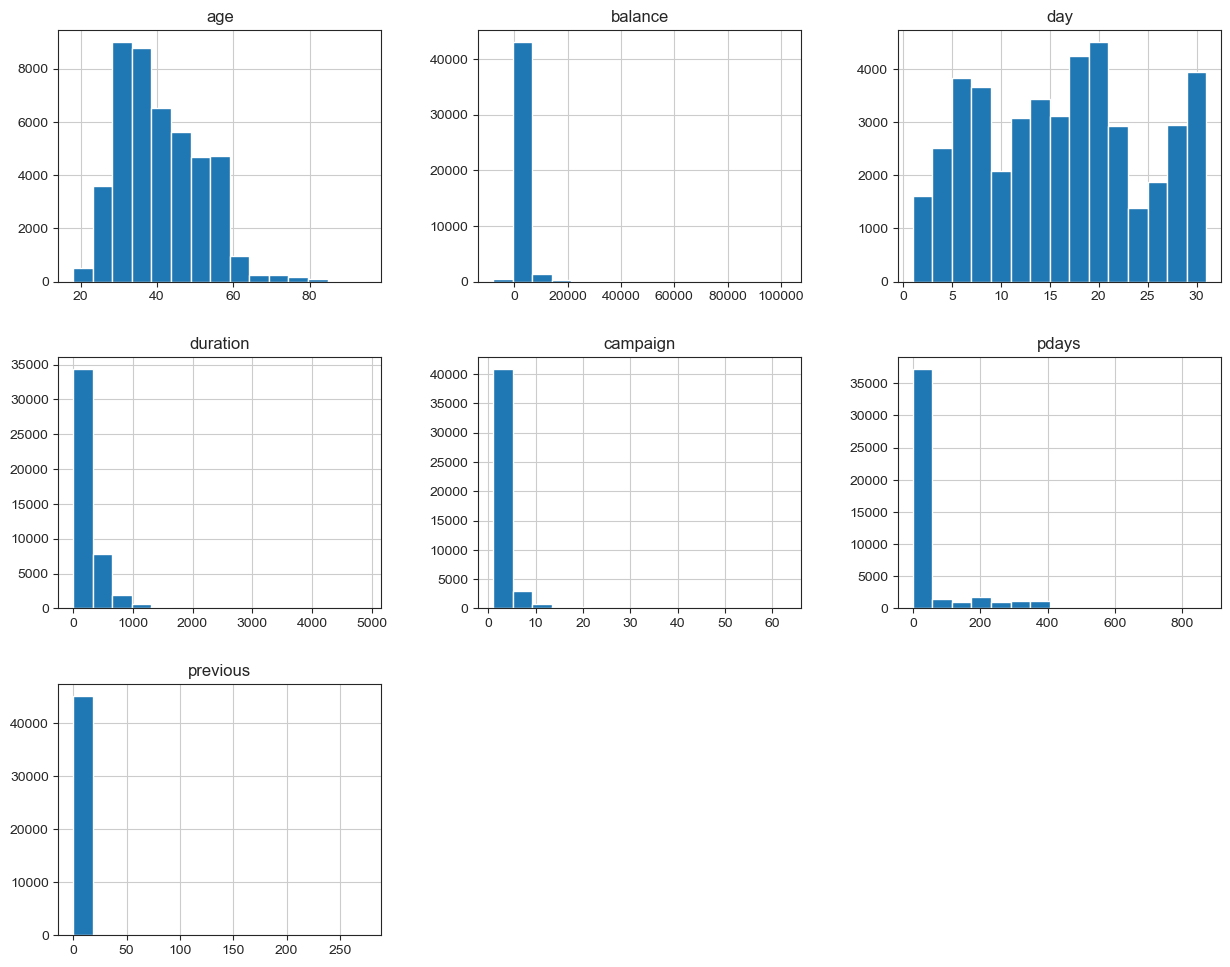

In [8]:
df[df.columns].hist(bins=15, figsize=(15, 16), layout=(4, 3));

<AxesSubplot:>

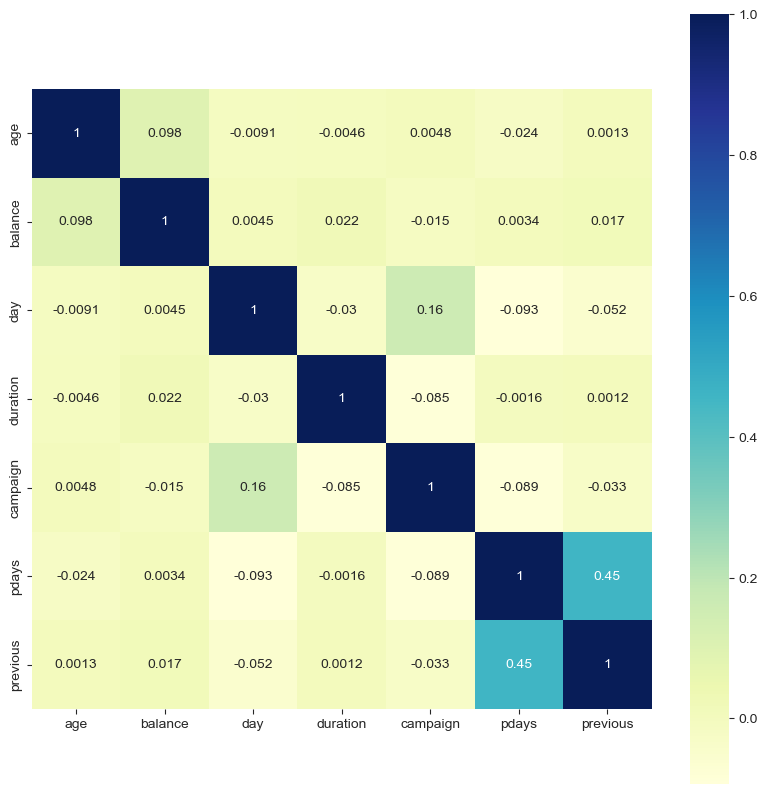

In [9]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,square=True,annot=True, cmap = "YlGnBu")

# Data Cleaning

In [10]:
df["deposit"] = np.where(df['deposit'] == "yes", 1, 0)

In [11]:
catg = ['job', 'marital', 'education', 'housing', 'loan',"default", 'contact', 'month',"poutcome"]
df = pd.get_dummies(df, columns=catg).drop(["pdays"], axis=1)
df.head()

,age,balance,day,duration,campaign,previous,deposit,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<AxesSubplot:>

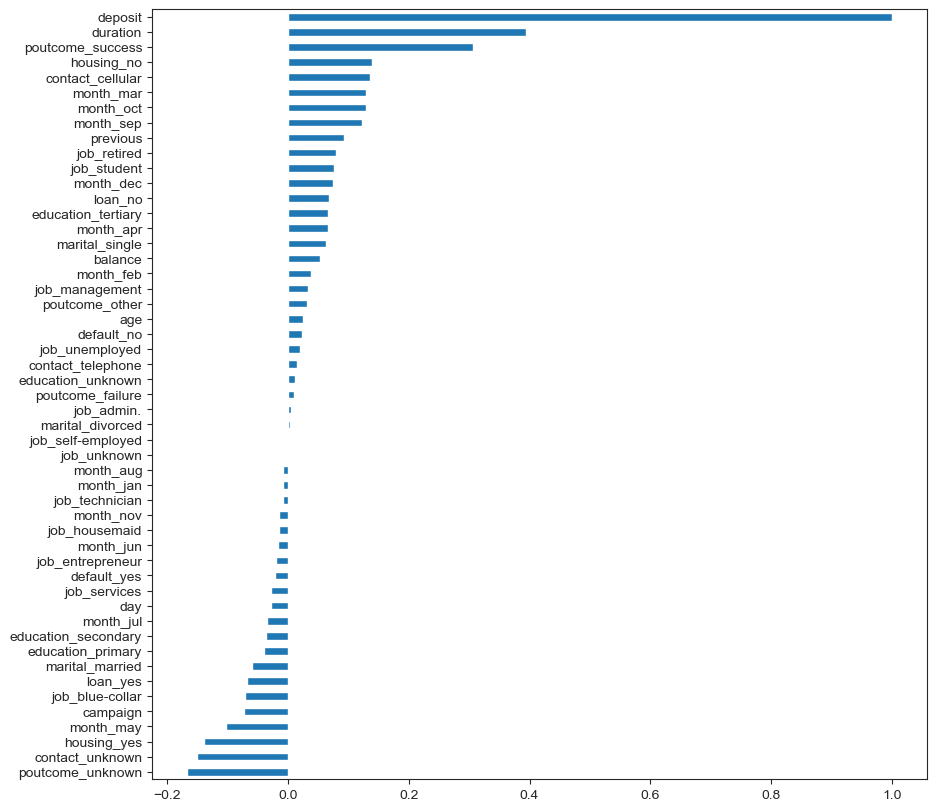

In [12]:
plt.figure(figsize=(10,10))
y = df.corr()['deposit'].sort_values(ascending = True)
y.plot(kind="barh")

# Train and Test Data

In [13]:
X = df.drop('deposit',axis=1)
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=5)

print("Original:", df.shape,
      "\nX Train:",X_train.shape,
      "\nX Test:", X_test.shape,
      "\n",
      "\ny Train:", y_train.shape,
      "\ny Test:", y_test.shape)

Original: (45211, 51) 
X Train: (31647, 50) 
X Test: (13564, 50) 
 
y Train: (31647,) 
y Test: (13564,)


In [14]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [15]:
print("Mean:\n",
      np.round(np.mean(X_train,axis=0),1),
      "\nStandard Deviation:\n",
      np.round(np.std(X_train,axis=0),1))

Mean:
 [-0.  0.  0.  0.  0.  0. -0. -0. -0. -0.  0.  0. -0.  0.  0.  0.  0.  0.
  0. -0. -0. -0. -0. -0.  0.  0. -0. -0.  0. -0.  0. -0.  0. -0.  0.  0.
  0. -0. -0. -0.  0.  0.  0.  0. -0.  0. -0. -0.  0.  0.] 
Standard Deviation:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


# Logistic Regression

In [16]:
log = LogisticRegression(random_state=5)
log_mod = log.fit(X_train,y_train)

log_res = pd.DataFrame(log_mod.coef_,columns=list(X.columns))
log_res

print(classification_report(y_test,log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11965
           1       0.66      0.36      0.47      1599

    accuracy                           0.90     13564
   macro avg       0.79      0.67      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [17]:
print(average_precision_score(y_test,log.predict_proba(X_test)[:,1]))
print(roc_auc_score(y_test,log.predict_proba(X_test)[:,1]))

0.5646480839463879
0.9109146517869113


In [18]:
pd.crosstab(y_test,log.predict(X_test))

col_0,0,1
deposit,,
0,11673,292
1,1024,575


In [19]:
log_y_pred = log.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, log_y_pred)

Text(0, 0.5, 'TPR (Recall)')

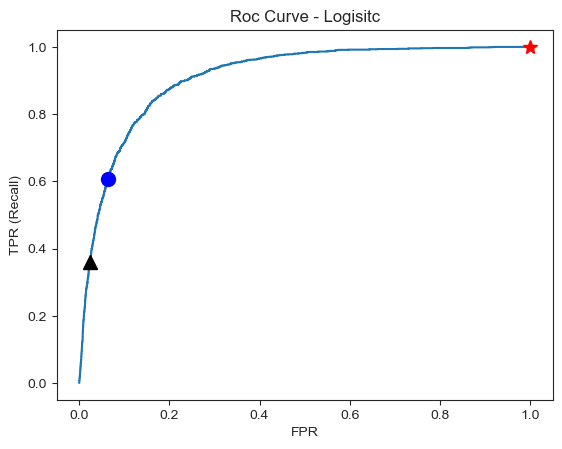

In [20]:
pt = np.argmin(np.abs(thresholds - 0.5))
newpt = np.argmin(np.abs(thresholds - 0.25))
thirdpt = np.argmin(np.abs(thresholds - 0.0001))

plt.title("Roc Curve - Logisitc")
plt.plot(fpr, tpr, label = 'rf')
plt.plot(fpr[pt], tpr[pt], '^', c = 'k', markersize = 10)
plt.plot(fpr[newpt], tpr[newpt], 'o', c = 'b', markersize = 10)
plt.plot(fpr[thirdpt], tpr[thirdpt], '*', c = 'r', markersize = 10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

91% akurat, yang merupakan nilai yang sangat tinggi dan kinerjanya sangat baik. Laporan klasifikasi menunjukkan presisi orang yang tidak berlangganan sebesar 92% (0) dan presisi orang yang berlangganan sebesar 67% (1).

# K-Nearest Neighbors

In [21]:
knn = KNeighborsClassifier().fit(X_train,y_train)

In [22]:
print(classification_report(y_test,knn.predict(X_test)))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11965
           1       0.59      0.33      0.42      1599

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564



In [23]:
pd.crosstab(y_test,knn.predict(X_test))

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


col_0,0,1
deposit,,
0,11598,367
1,1076,523


In [24]:
knn_y_pred = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred)

Text(0, 0.5, 'TPR (Recall)')

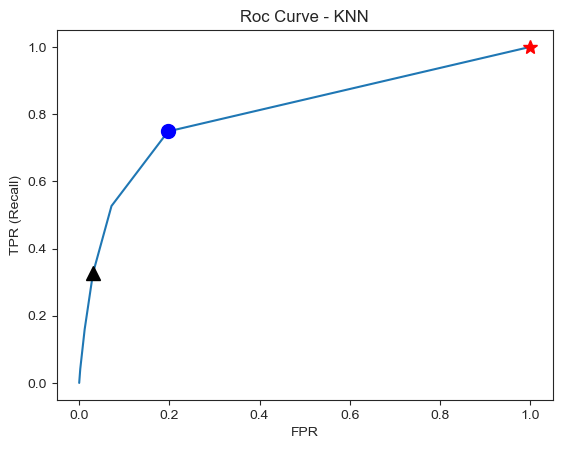

In [25]:
pt = np.argmin(np.abs(thresholds - 0.5))
newpt = np.argmin(np.abs(thresholds - 0.25))
thirdpt = np.argmin(np.abs(thresholds - 0.0001))

plt.title("Roc Curve - KNN")
plt.plot(fpr, tpr, label = 'rf')
plt.plot(fpr[pt], tpr[pt], '^' ,c = 'k', markersize = 10)
plt.plot(fpr[newpt], tpr[newpt], 'o', c = 'b', markersize = 10)
plt.plot(fpr[thirdpt], tpr[thirdpt], '*', c= 'r', markersize = 10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

# Decision Tree

In [26]:
dtree= DecisionTreeClassifier(criterion='gini',max_depth=10,random_state=100,min_samples_leaf=10)
dtree.fit(X_train, y_train)
prediction=dtree.predict(X_test)

In [27]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)
print("Accuracy score of training data: ", acc_train)
print("Accuracy score of test data: ", acc_test)

Accuracy score of training data:  1.0
Accuracy score of test data:  0.8754792096726629


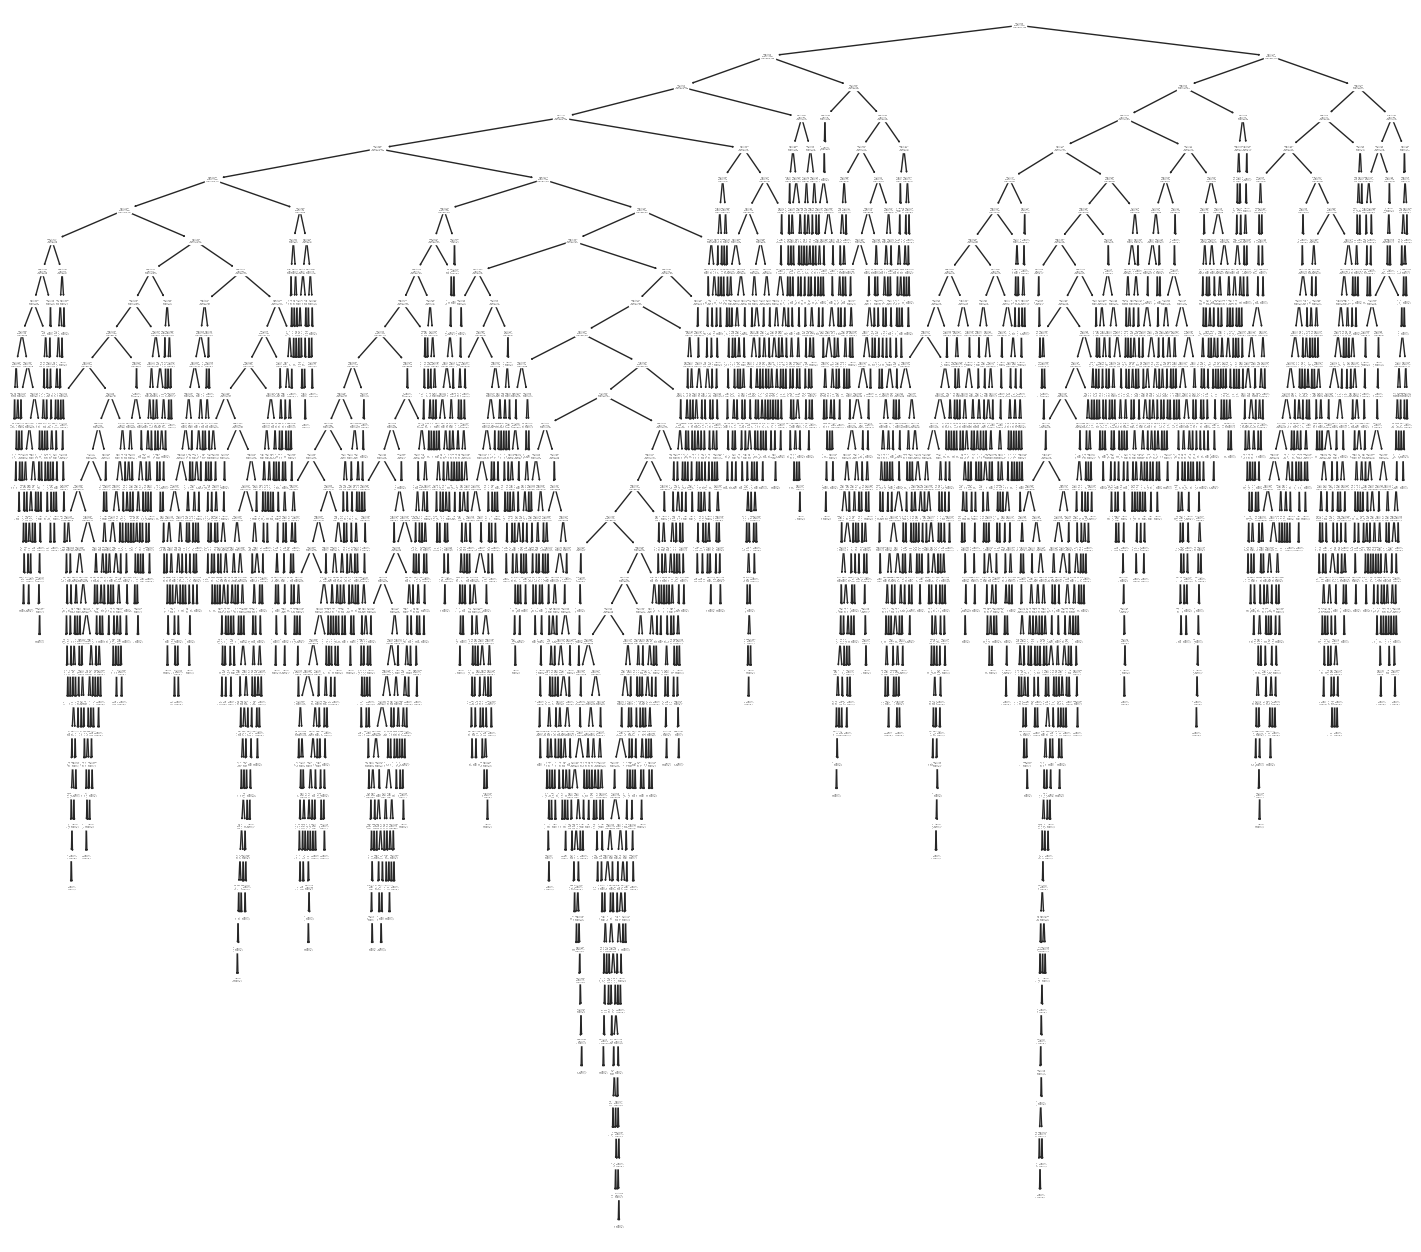

In [28]:
plt.figure(figsize = (18, 16))
tree.plot_tree(clf)
plt.show()

In [29]:
path = clf.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
print("ccp alpha values :",ccp_alphas)
print()
print("Impurities in Decision Tree :",impurities)

ccp alpha values : [0.00000000e+00 1.25849484e-05 1.26363361e-05 ... 3.17155441e-03
 1.68004272e-02 2.50784363e-02]

Impurities in Decision Tree : [0.00000000e+00 6.29247420e-05 1.26106423e-04 ... 1.64128069e-01
 1.80928496e-01 2.06006932e-01]


In [30]:
clfs=[]
for ccp_alpha in ccp_alphas:
    clf=DecisionTreeClassifier(random_state=0,ccp_alpha=ccp_alpha)
    clf.fit(X_train,y_train)
    clfs.append(clf)
print("Last node in Decision tree is {} and ccp_alpha for last node is {}".format(clfs[-1].tree_.node_count,ccp_alphas[-1]))

Last node in Decision tree is 1 and ccp_alpha for last node is 0.025078436260827508


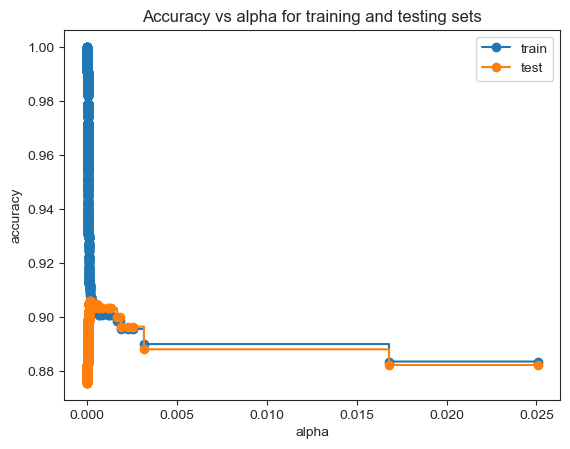

In [31]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

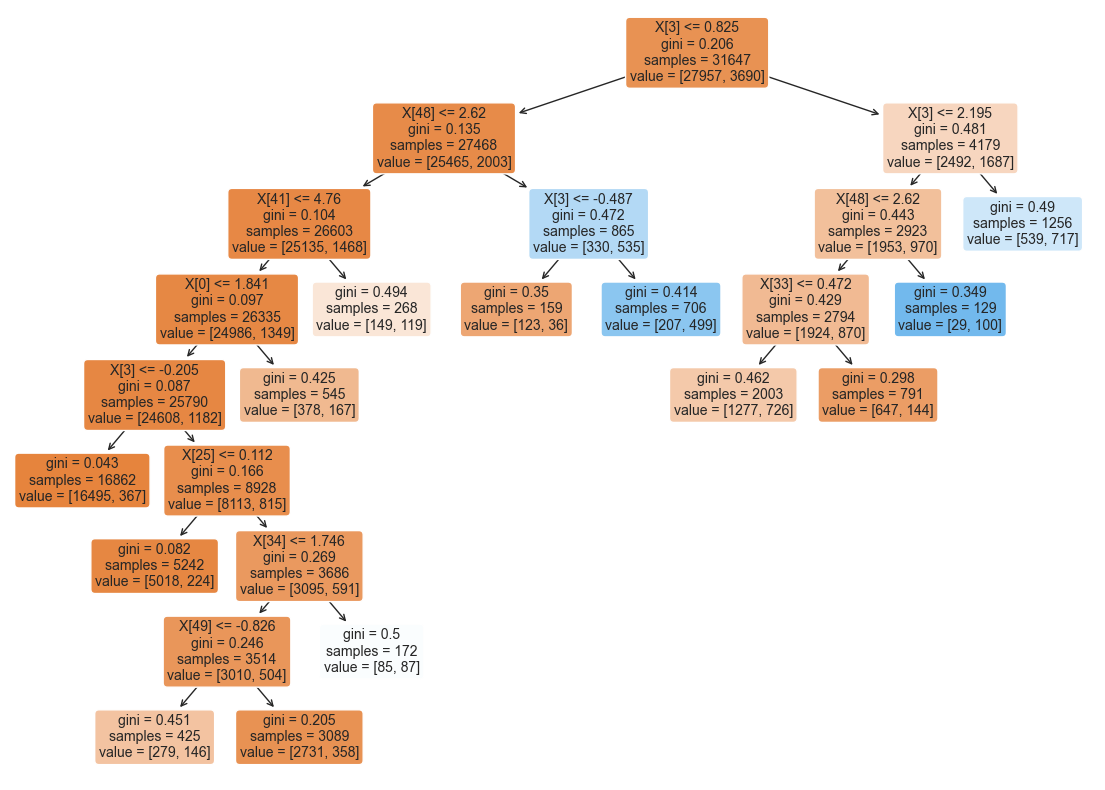

In [32]:
clf=DecisionTreeClassifier(random_state=0,ccp_alpha=0.001)
clf.fit(X_train,y_train)
plt.figure(figsize=(14,10))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

In [33]:
accuracy_score(y_test,clf.predict(X_test))

0.9031996461220879

# Random Forest

In [34]:
num_trees=[50,300,1000]

In [35]:
cvres=[]
for num in num_trees:
    rf_cv_clf = RandomForestClassifier(n_estimators = num,random_state=5)
    cvclf = cross_validate(rf_cv_clf, X_train, y_train, cv=5, scoring='f1')
    cvres.append(cvclf['test_score'].mean())

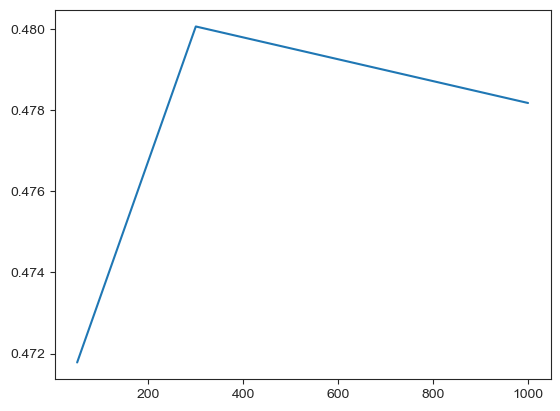

In [36]:
plt.plot(num_trees,cvres)

In [37]:
rf = RandomForestClassifier(n_estimators = 300,random_state=5).fit(X_train,y_train)

In [38]:
print(classification_report(y_test,rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11965
           1       0.67      0.40      0.50      1599

    accuracy                           0.91     13564
   macro avg       0.80      0.69      0.72     13564
weighted avg       0.89      0.91      0.90     13564



In [39]:
pd.crosstab(y_test,rf.predict(X_test))

col_0,0,1
deposit,,
0,11659,306
1,964,635


Text(0, 0.5, 'TPR (Recall)')

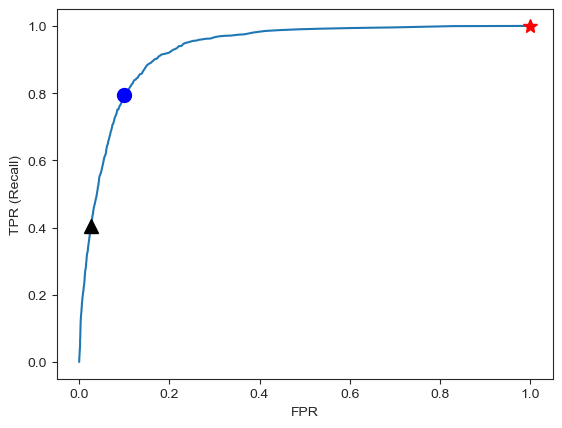

In [40]:
fpr, tpr, thresholds = roc_curve(y_test,rf.predict_proba(X_test)[:, 1])

pt = np.argmin(np.abs(thresholds - 0.5))
newpt = np.argmin(np.abs(thresholds - 0.25))
thirdpt = np.argmin(np.abs(thresholds - 0.0001))

plt.plot(fpr, tpr, label = 'rf')
plt.plot(fpr[pt], tpr[pt], '^', c= 'k', markersize = 10)
plt.plot(fpr[newpt], tpr[newpt], 'o', c = 'b', markersize = 10)
plt.plot(fpr[thirdpt], tpr[thirdpt], '*', c = 'r', markersize = 10)
plt.xlabel('FPR')
plt.ylabel('TPR (Recall)')

In [41]:
nb = GaussianNB()
nb.fit(X_train,y_train)
naiveb = nb.predict(X_test)
prediction = nb.predict(X_test)

Naive Bayes Prediction Accuracy Score:  0.882  with Smoothing =  1.0


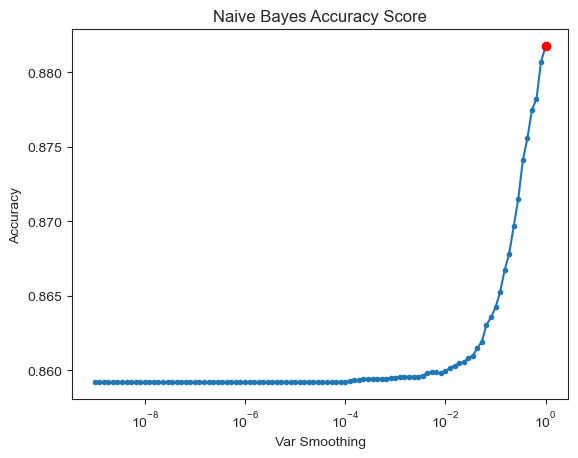

In [42]:
e_gnb=np.zeros(100)
params_NB = np.logspace(0,-9, num=100)
for i in range(0,len(params_NB)):
    gnb_model = GaussianNB(var_smoothing=params_NB[i])
    gnb_model.fit(X_train, y_train)
    yh_gnb=gnb_model.predict(X_test)
    e_gnb[i]=accuracy_score(y_test, yh_gnb)
    
print("Naive Bayes Prediction Accuracy Score: ",np.round(e_gnb.max(),3),' with Smoothing = ',params_NB[e_gnb.argmax()])
plt.plot(params_NB,e_gnb,'.-')
plt.plot(params_NB[e_gnb.argmax()],e_gnb.max(),'or')
plt.title('Naive Bayes Accuracy Score')
plt.xscale('log')
plt.xlabel('Var Smoothing')
plt.ylabel('Accuracy')
plt.show()

# Confusion Matrix

<AxesSubplot:>

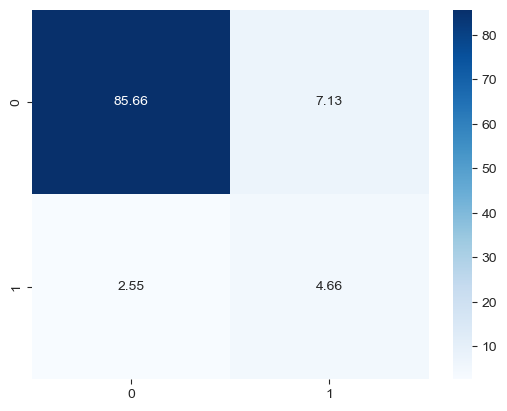

In [43]:
y_pred = clf.predict(X_test)

cf_matrix = confusion_matrix(y_pred, y_test)
sns.heatmap((cf_matrix / np.sum(cf_matrix)*100), annot = True, fmt=".2f", cmap="Blues")